# Project 7 - Model explaination

**Author: Linh Nguyen**<br>

**StudentID: 23161711**<br>

**Date: Sep 2022**

## 1. Load data and import package

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Capstone_project

Mounted at /content/drive
/content/drive/MyDrive/Capstone_project


In [ ]:
!pip install tensorflow==2.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.7 MB 15 kB/s 
     |████████████████████████████████| 462 kB 68.2 MB/s 
     |████████████████████████████████| 132 kB 86.7 MB/s 
     |████████████████████████████████| 3.8 MB 75.9 MB/s 
     |████████████████████████████████| 14.8 MB 79.2 MB/s 
     |████████████████████████████████| 2.9 MB 75.5 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=3c47c86ed644c790c65e782935b5ddc359c37d3780a72934f303136737e08710
  Stored in directory: /root/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68727 sha256=3708207103c790fe4091b8b1d3dfe153420e62af70cc26d1ec6befda234649c0
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built term

In [ ]:
import numpy as np
import pandas as pd
import re
from tensorflow import keras
#from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras import layers
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import  tensorflow as tf
#from gensim.models import KeyedVectors
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
tf.compat.v1.disable_v2_behavior()



Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
! ls /content/drive/MyDrive/Capstone_project/raw

diagnosis.csv  icd9toicd10cmgem.csv  pyxis.csv	 vitalsign.csv
edstays.csv    medrecon.csv	     triage.csv


In [ ]:
keras.__version__

'2.4.0'

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
edstay_ad1 = pd.read_csv('edstay_ad1.csv')
edstay_ad1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428284 entries, 0 to 428283
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   arrival_transport              428284 non-null  object 
 1   temperature                    428284 non-null  float64
 2   heartrate                      428284 non-null  float64
 3   resprate                       428284 non-null  float64
 4   o2sat                          428284 non-null  float64
 5   sbp                            428284 non-null  float64
 6   dbp                            428284 non-null  float64
 7   acuity                         428284 non-null  float64
 8   intime_h                       428284 non-null  float64
 9   historical_stay_status         428284 non-null  object 
 10  historical_stay_length_in_day  428284 non-null  float64
 11  temperaturemissing             428284 non-null  float64
 12  heartratemissing              

In [ ]:
num_attr = edstay_ad1.select_dtypes(include=['float64']).columns
cat_attr = edstay_ad1.select_dtypes(include=['O']).columns

In [ ]:
trans_pip = ColumnTransformer([
    ("num",StandardScaler(), num_attr),
    ("cat",OneHotEncoder(),cat_attr)
],remainder='passthrough')

In [ ]:
train_samples_o = pd.read_csv('train_samples_o.csv')
train_samples_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299799 entries, 0 to 299798
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   arrival_transport              299799 non-null  object 
 1   temperature                    299799 non-null  float64
 2   heartrate                      299799 non-null  float64
 3   resprate                       299799 non-null  float64
 4   o2sat                          299799 non-null  float64
 5   sbp                            299799 non-null  float64
 6   dbp                            299799 non-null  float64
 7   acuity                         299799 non-null  float64
 8   intime_h                       299799 non-null  float64
 9   historical_stay_status         299799 non-null  object 
 10  historical_stay_length_in_day  299799 non-null  float64
 11  temperaturemissing             299799 non-null  float64
 12  heartratemissing              

In [ ]:
trans_pip.fit_transform(train_samples_o)

array([[ 4.48122197e-01,  1.35118894e+00,  1.37313350e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-4.44662244e-03, -1.97339327e+00, -6.21237540e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-4.44662244e-03, -1.18348018e-03,  8.95864241e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 5.58958869e-02, -7.33718543e-01, -6.21237540e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 8.60671415e-02, -1.18348018e-03,  1.37313350e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 9.61033527e-01,  1.91467745e+00,  1.37313350e-02, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [ ]:
loaded_1 = keras.models.load_model("/content/drive/MyDrive/Capstone_project/model_3.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
x_test_o = pd.read_csv("x_test_o.csv").to_numpy()
x_test_his = pd.read_csv("x_test_his.csv").to_numpy()
x_test = pd.read_csv("x_test.csv").to_numpy()

test_samples_his = pd.read_csv("test_samples_his.csv")
test_samples_chief = pd.read_csv("test_samples_chief.csv")

In [ ]:
x_test_o[0].shape

(24,)

In [ ]:
loaded_1.predict(x=[x_test_o[1:2],x_test_his[1:2], x_test[1:2]])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


array([[0.11107174]], dtype=float32)

In [ ]:
loaded_1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 5, 200)       40400       input_5[0][0]                    
__________________________________________________________________________________________________
embedding (Embedding)           (None, 5, 200)       875600      input_6[0][0]                    
____________________________________________________________________________________________

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.4 MB/s 


In [ ]:
import shap

explainer = shap.DeepExplainer(loaded_1, [x_test_o[:1000],x_test_his[:1000],x_test[:1000]])


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.



In [ ]:
feature_names = list(trans_pip.get_feature_names_out())

In [ ]:
feature_names

['num__temperature',
 'num__heartrate',
 'num__resprate',
 'num__o2sat',
 'num__sbp',
 'num__dbp',
 'num__acuity',
 'num__intime_h',
 'num__historical_stay_length_in_day',
 'num__temperaturemissing',
 'num__heartratemissing',
 'num__respratemissing',
 'num__o2satmissing',
 'num__sbpmissing',
 'num__dbpmissing',
 'num__acuitymissing',
 'cat__arrival_transport_AMBULANCE',
 'cat__arrival_transport_HELICOPTER',
 'cat__arrival_transport_OTHER',
 'cat__arrival_transport_UNKNOWN',
 'cat__arrival_transport_WALK IN',
 'cat__historical_stay_status_ADMITTED',
 'cat__historical_stay_status_HOME',
 'cat__historical_stay_status_NO HISTORY']

In [ ]:
feature_names.extend(['his_icd_1','his_icd_2','his_icd_3','his_icd_4','his_icd_5','chief_1','chief_2','chief_3','chief_4','chief_5'])

In [ ]:
len(feature_names)

34

In [ ]:
x_test_o[:1]

array([[ 0.26709467,  2.25277056,  0.16544151, -0.4662586 , -0.5151856 ,
         0.01734985, -0.885889  ,  0.60481865, -0.27944738, -0.23597102,
        -0.19832792, -0.21845075, -0.22024656, -0.20543307, -0.21025346,
        -0.12018833,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ]])

In [ ]:
shap.initjs()

shap_values1 = explainer.shap_values([x_test_o[5:6],x_test_his[5:6],x_test[5:6]])

shap.force_plot(explainer.expected_value[0], np.concatenate([shap_values1[0][0], shap_values1[0][1], shap_values1[0][2]], axis=1), feature_names = feature_names)

In [ ]:
test_samples_chief[5:6].astype(str).values.tolist()[0][0].split(",")[:5]

['r knee pain']

In [ ]:
shap.initjs()

shap_values1 = explainer.shap_values([x_test_o[10:11],x_test_his[10:11],x_test[10:11]])

shap.force_plot(explainer.expected_value[0], np.concatenate([shap_values1[0][0], shap_values1[0][1], shap_values1[0][2]], axis=1), feature_names = feature_names)


In [ ]:
test_samples_chief[10:11].astype(str).values.tolist()[0][0].split(",")

['chest pain cardiac features ']

In [ ]:
shap_values = explainer.shap_values([x_test_o[:500],x_test_his[:500],x_test[:500]])

In [ ]:
# compute SHAP values

explainer = shap.DeepExplainer(loaded_1, [x_test_o[:1000],x_test_his[:1000],x_test[:1000]])

explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_test)

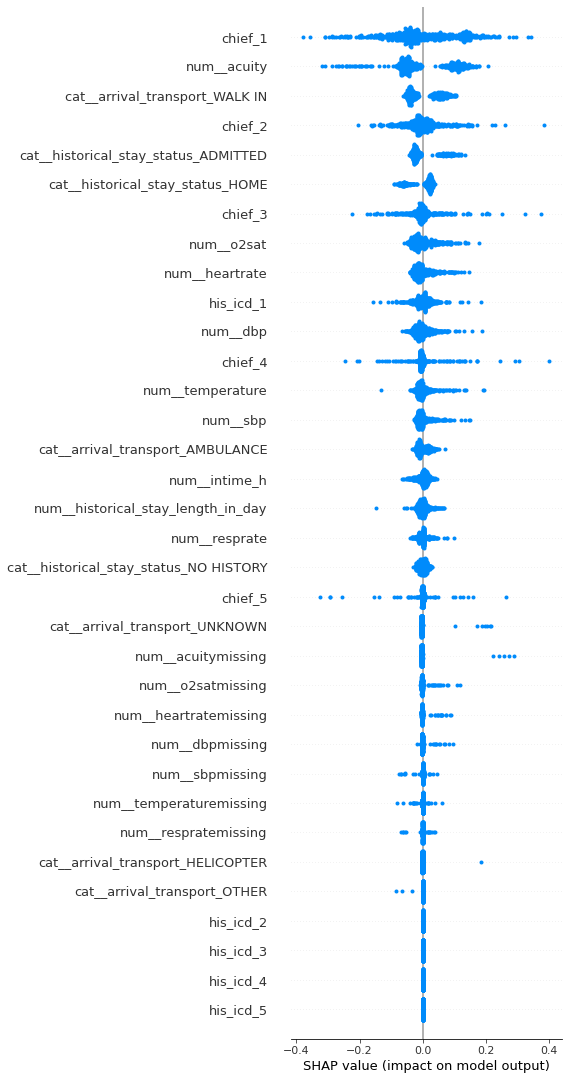

In [ ]:
#shap_values = explainer.shap_values([x_test_o[:1000],x_test_his[:1000],x_test[:1000]])
shap.summary_plot(np.concatenate([shap_values[0][0], shap_values[0][1], shap_values[0][2]], axis=1), feature_names = feature_names, max_display = 40)

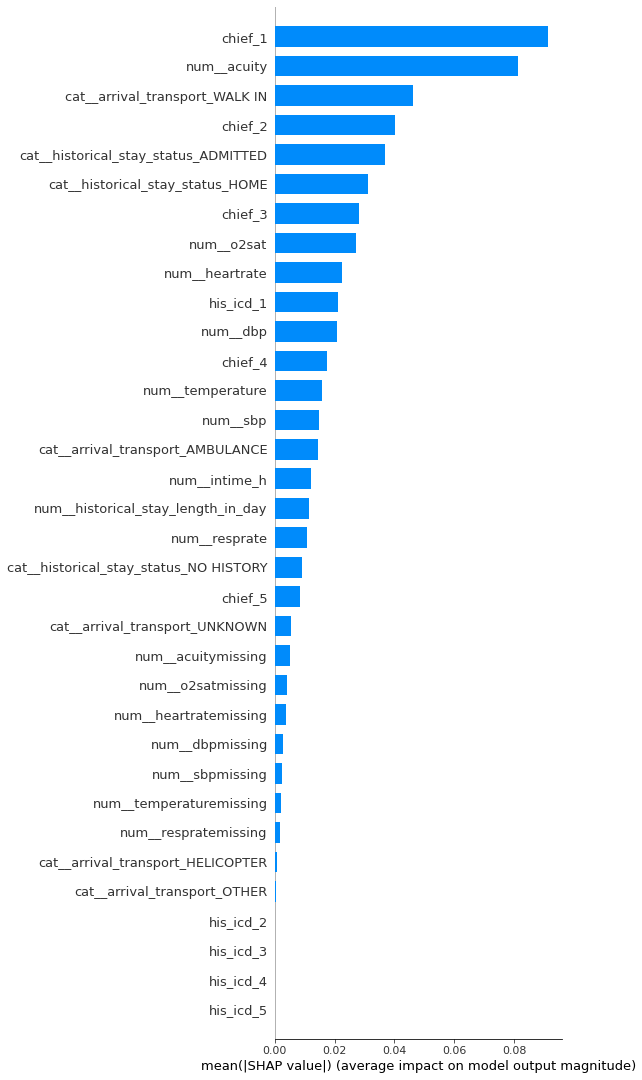

In [ ]:
shap.summary_plot(np.concatenate([shap_values[0][0], shap_values[0][1], shap_values[0][2]], axis=1), feature_names = feature_names, max_display = 40, plot_type="bar")

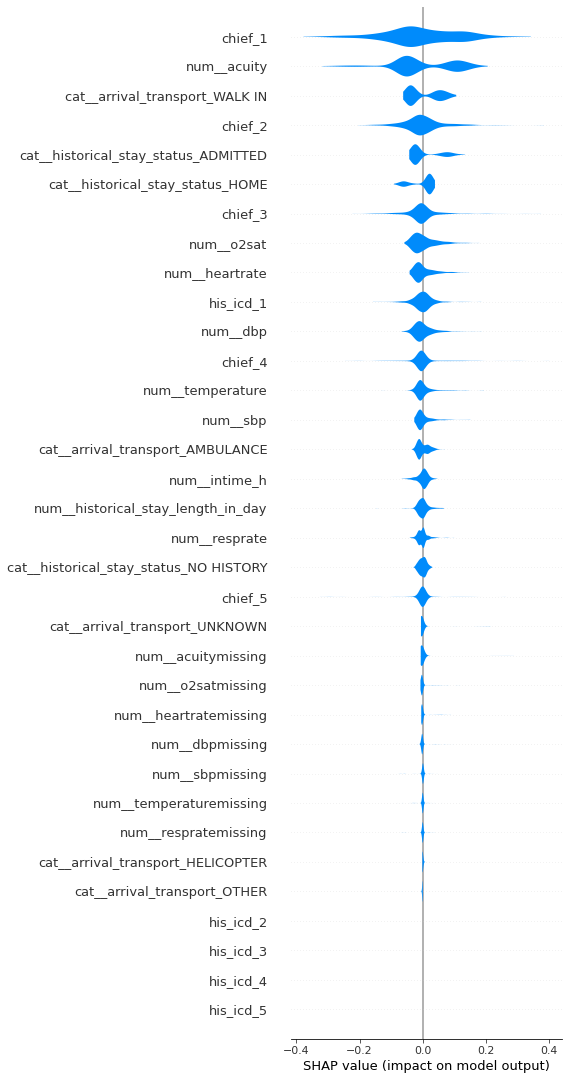

In [ ]:
shap.summary_plot(np.concatenate([shap_values[0][0], shap_values[0][1], shap_values[0][2]], axis=1), feature_names = feature_names, max_display = 40, plot_type="violin",color_bar_label='Feature value')


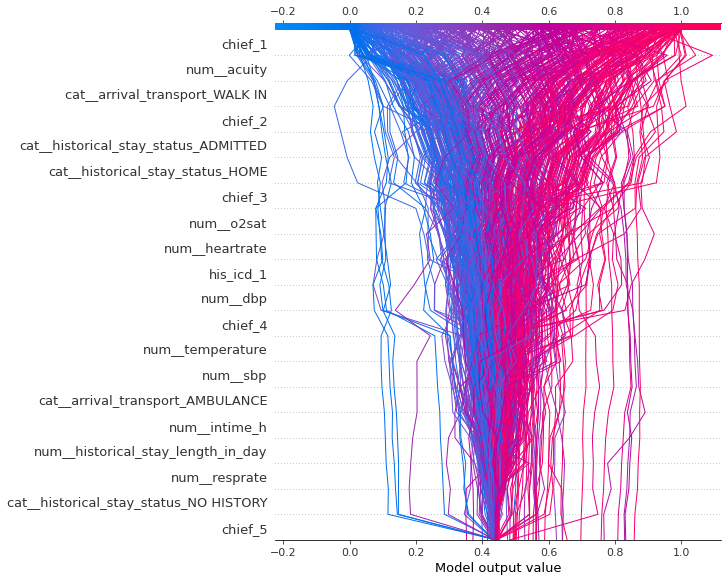

In [ ]:
shap.decision_plot(explainer.expected_value[0], np.concatenate([shap_values[0][0], shap_values[0][1], shap_values[0][2]], axis=1),feature_names = feature_names)